In [1]:
# read file metadata.csv
import pandas as pd
df = pd.read_csv('metadata.csv')
df.head()

,examId,seriesNo,aclDiagnosis,kneeLR,roiX,roiY,roiZ,roiHeight,roiWidth,roiDepth,volumeFilename
0,329637,8,0,1,139,184,14,74,72,3,329637-8.pck
1,390116,9,0,0,113,105,10,83,98,6,390116-9.pck
2,404663,8,1,1,120,117,15,101,115,2,404663-8.pck
3,406320,9,0,0,117,124,12,91,80,3,406320-9.pck
4,412857,8,0,1,122,105,14,83,98,4,412857-8.pck


In [2]:
# dimension
print(df.shape)

(917, 11)


In [3]:
# missing value
df.isnull().sum()

,0
examId,0
seriesNo,0
aclDiagnosis,0
kneeLR,0
roiX,0
roiY,0
roiZ,0
roiHeight,0
roiWidth,0
roiDepth,0


In [4]:
# drop examId, seriesId, file
df = df.drop(['examId', 'seriesNo', 'volumeFilename'], axis=1)
df.head()

,aclDiagnosis,kneeLR,roiX,roiY,roiZ,roiHeight,roiWidth,roiDepth
0,0,1,139,184,14,74,72,3
1,0,0,113,105,10,83,98,6
2,1,1,120,117,15,101,115,2
3,0,0,117,124,12,91,80,3
4,0,1,122,105,14,83,98,4


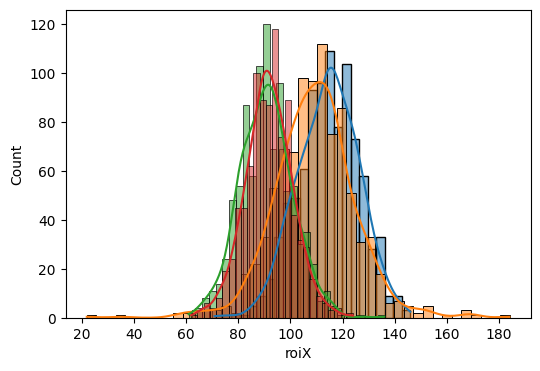

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = ["roiX", "roiY", "roiWidth", "roiHeight"]
plt.figure(figsize=(6, 4))
for col in numeric_columns:
    sns.histplot(df[col], kde=True)
plt.show()

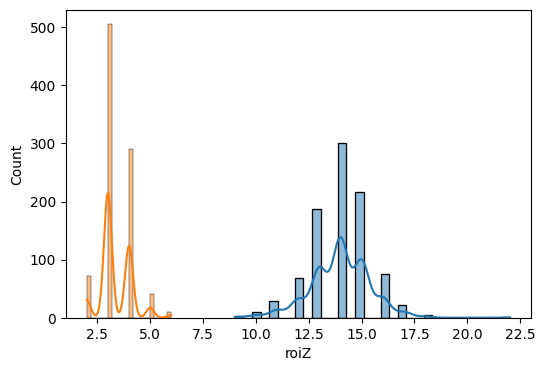

In [6]:
numeric_columns = ["roiZ", "roiDepth"]
# Simple version: one plot per feature, shown sequentially
plt.figure(figsize=(6, 4))
for col in numeric_columns:
    sns.histplot(df[col], kde=True)
plt.show()

In [7]:
# normalization
numeric_columns = df.drop(['aclDiagnosis', 'kneeLR'], axis=1).columns.tolist()
scaler_data = {}

for col in numeric_columns:
  mean = df[col].mean()
  std = df[col].std()
  scaler_data[col] = {'mean': mean, 'std': std}
  if std != 0:
    df[col] = (df[col] - mean) / std
  else:
    df[col] = 0

df.head()

,aclDiagnosis,kneeLR,roiX,roiY,roiZ,roiHeight,roiWidth,roiDepth
0,0,1,2.105412,4.781778,0.00542,-1.957070,-1.854831,-0.490413
1,0,0,-0.128654,-0.276504,-2.83470,-0.965256,0.719110,3.597847
2,1,1,0.472825,0.491842,0.71545,1.018373,2.402071,-1.853166
3,0,0,0.215048,0.940045,-1.41464,-0.083643,-1.062849,-0.490413
4,0,1,0.644676,-0.276504,0.00542,-0.965256,0.719110,0.872340


In [8]:
# cek imbalance data
df['aclDiagnosis'].value_counts()

,count
aclDiagnosis,
0,690
1,172
2,55


In [9]:
# split to apply smote
X = df.drop(['aclDiagnosis'], axis=1)
y = df['aclDiagnosis']
print(X)
print(y)

     kneeLR      roiX      roiY     roiZ  roiHeight  roiWidth  roiDepth
0         1  2.105412  4.781778  0.00542  -1.957070 -1.854831 -0.490413
1         0 -0.128654 -0.276504 -2.83470  -0.965256  0.719110  3.597847
2         1  0.472825  0.491842  0.71545   1.018373  2.402071 -1.853166
3         0  0.215048  0.940045 -1.41464  -0.083643 -1.062849 -0.490413
4         1  0.644676 -0.276504  0.00542  -0.965256  0.719110  0.872340
..      ...       ...       ...      ...        ...       ...       ...
912       1 -0.128654  1.132131  1.42548   1.018373  0.818108 -0.490413
913       1 -0.816059 -0.468591  0.00542   0.357164  0.917105 -0.490413
914       0  0.300974 -1.621111  0.71545   0.908172  0.917105 -1.853166
915       0 -0.816059 -0.788735  0.71545   1.238777  1.511092  0.872340
916       0 -0.128654 -0.084418  0.00542   1.238777  1.907083  0.872340

[917 rows x 7 columns]
0      0
1      0
2      1
3      0
4      0
      ..
912    1
913    1
914    0
915    0
916    1
Name: aclDiag

In [10]:
# smote
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

X_resampled, y_resampled = sm.fit_resample(X, y)
print(X_resampled, y_resampled)

      kneeLR      roiX      roiY      roiZ  roiHeight  roiWidth  roiDepth
0          1  2.105412  4.781778  0.005420  -1.957070 -1.854831 -0.490413
1          0 -0.128654 -0.276504 -2.834700  -0.965256  0.719110  3.597847
2          1  0.472825  0.491842  0.715450   1.018373  2.402071 -1.853166
3          0  0.215048  0.940045 -1.414640  -0.083643 -1.062849 -0.490413
4          1  0.644676 -0.276504  0.005420  -0.965256  0.719110  0.872340
...      ...       ...       ...       ...        ...       ...       ...
2065       0 -0.587725 -1.867205  1.425480   1.545235  1.291404 -1.810509
2066       1 -0.882672  2.011329 -0.185386  -0.986614 -0.115598  1.604765
2067       1  0.394674  0.160112 -0.058820   1.919927  2.186634  2.111798
2068       0 -0.840703 -0.432059  0.106699   0.845295  1.708937  0.677957
2069       1 -0.411385 -0.592105  0.690258  -1.508444 -0.663346 -0.490413

[2070 rows x 7 columns] 0       0
1       0
2       1
3       0
4       0
       ..
2065    2
2066    2
2067   

In [11]:
# dataframe setelah smote
df = pd.DataFrame(X_resampled, columns=X.columns)
df['aclDiagnosis'] = y_resampled
df

,kneeLR,roiX,roiY,roiZ,roiHeight,roiWidth,roiDepth,aclDiagnosis
0,1,2.105412,4.781778,0.005420,-1.957070,-1.854831,-0.490413,0
1,0,-0.128654,-0.276504,-2.834700,-0.965256,0.719110,3.597847,0
2,1,0.472825,0.491842,0.715450,1.018373,2.402071,-1.853166,1
3,0,0.215048,0.940045,-1.414640,-0.083643,-1.062849,-0.490413,0
4,1,0.644676,-0.276504,0.005420,-0.965256,0.719110,0.872340,0
...,...,...,...,...,...,...,...,...
2065,0,-0.587725,-1.867205,1.425480,1.545235,1.291404,-1.810509,2
2066,1,-0.882672,2.011329,-0.185386,-0.986614,-0.115598,1.604765,2
2067,1,0.394674,0.160112,-0.058820,1.919927,2.186634,2.111798,2
2068,0,-0.840703,-0.432059,0.106699,0.845295,1.708937,0.677957,2


In [12]:
df['aclDiagnosis'].value_counts()

,count
aclDiagnosis,
0,690
1,690
2,690


In [13]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

In [14]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [15]:
# SVM linear
svm_linear = SVC(kernel='linear', probability=True, random_state=42)
linear_scores = cross_val_score(svm_linear, X_resampled, y_resampled, cv=skf, scoring='accuracy')
print(linear_scores.mean())

0.538647342995169


In [16]:
# SVM Quadratic
svm_quadratic = SVC(kernel='poly', degree=2, probability=True, random_state=42)
quadratic_scores = cross_val_score(svm_quadratic, X_resampled, y_resampled, cv=skf, scoring='accuracy')
print(quadratic_scores.mean())

0.5246376811594202


In [17]:
# SVM Cubic
svm_cubic = SVC(kernel='poly', degree=3, probability=True, random_state=42)
cubic_scores = cross_val_score(svm_cubic, X_resampled, y_resampled, cv=skf, scoring='accuracy')
print(cubic_scores.mean())

0.6545893719806763


In [18]:
# SVM RBF
svm_rbf = SVC(kernel='rbf', probability=True, random_state=42)
rbf_scores = cross_val_score(svm_rbf, X_resampled, y_resampled, cv=skf, scoring='accuracy')
print(rbf_scores.mean())

0.7086956521739131


In [19]:
estimators = [
    ('svm_linear', svm_linear),
    ('svm_cubic', svm_cubic),
    ('svm_rbf', svm_rbf)
]

In [20]:
stacking_svm = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_scores = cross_val_score(stacking_svm, X_resampled, y_resampled, cv=skf, scoring='accuracy')
print(stacking_scores.mean())

0.7217391304347827


In [21]:
voting_svm = VotingClassifier(estimators=estimators, voting='hard')
voting_scores = cross_val_score(voting_svm, X_resampled, y_resampled, cv=skf, scoring='accuracy')
print(voting_scores.mean())

0.673913043478261


In [22]:
# random forest
rf = rf_model = RandomForestClassifier(random_state=42, n_estimators=100, criterion='gini')
rf_scores = cross_val_score(rf_model, X_resampled, y_resampled, cv=skf, scoring='accuracy')
print(rf_scores.mean())

0.8642512077294686


In [23]:
k_values = range(1, 16)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', metric="euclidean")
    scores = cross_val_score(knn, X_resampled, y_resampled, cv=skf, scoring='accuracy')
    cv_scores.append(scores.mean())

best_k = k_values[cv_scores.index(max(cv_scores))]
print(f'Best k Euclidean KNN: {best_k}, Accuracy: {max(cv_scores)}')

cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', metric="euclidean")
    scores = cross_val_score(knn, X_resampled, y_resampled, cv=skf, scoring='accuracy')
    cv_scores.append(scores.mean())

best_k = k_values[cv_scores.index(max(cv_scores))]
print(f'Best k Weighted KNN (Euclidean): {best_k}, Accuracy: {max(cv_scores)}')

cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', metric="manhattan")
    scores = cross_val_score(knn, X_resampled, y_resampled, cv=skf, scoring='accuracy')
    cv_scores.append(scores.mean())

best_k = k_values[cv_scores.index(max(cv_scores))]
print(f'Best k Weighted KNN (Manhattan): {best_k}, Accuracy: {max(cv_scores)}')

Best k Euclidean KNN: 1, Accuracy: 0.8541062801932368
Best k Weighted KNN (Euclidean): 1, Accuracy: 0.8541062801932368
Best k Weighted KNN (Manhattan): 1, Accuracy: 0.8594202898550725


In [24]:
# weighted KNN
knn_weighted = KNeighborsClassifier(n_neighbors=1, weights='distance', metric='euclidean')
weighted_scores = cross_val_score(knn_weighted, X_resampled, y_resampled, cv=skf, scoring='accuracy')
print(weighted_scores.mean())

0.8541062801932368


In [25]:
# Euclidian KNN
knn_euclidean = KNeighborsClassifier(n_neighbors=1, weights='uniform', metric='euclidean')
euclidean_scores = cross_val_score(knn_euclidean, X_resampled, y_resampled, cv=skf, scoring='accuracy')
print(euclidean_scores.mean())

0.8541062801932368


In [26]:
# Manhattan KNN
knn_manhattan = KNeighborsClassifier(n_neighbors=1, weights='distance', metric='manhattan')
manhattan_scores = cross_val_score(knn_manhattan, X_resampled, y_resampled, cv=skf, scoring='accuracy')
print(manhattan_scores.mean())

0.8594202898550725


In [27]:
estimators = [
    ('knn_weighted', knn_weighted),
    ('knn_euclidean', knn_euclidean),
    ('knn_manhattan', knn_manhattan)
]
voting_knn = VotingClassifier(estimators=estimators, voting='hard')
voting_scores = cross_val_score(voting_knn, X_resampled, y_resampled, cv=skf, scoring='accuracy')
print(voting_scores.mean())

0.8541062801932368


In [28]:
# stacking knn
stacking_knn = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_scores = cross_val_score(stacking_knn, X_resampled, y_resampled, cv=skf, scoring='accuracy')
print(stacking_scores.mean())

0.8753623188405797


In [29]:
# stacking svn dan knn
estimators = [
    ('svm_rbf', svm_rbf),
    ('knn_manhattan', knn_manhattan)
]
stacking_svm_knn = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_scores = cross_val_score(stacking_svm_knn, X_resampled, y_resampled, cv=skf, scoring='accuracy')
print(stacking_scores.mean())

0.8589371980676329


In [30]:
# voting svm knn
voting_svm_knn = VotingClassifier(estimators=estimators, voting='soft')
voting_scores = cross_val_score(voting_svm_knn, X_resampled, y_resampled, cv=skf, scoring='accuracy')
print(voting_scores.mean())

0.8594202898550725


In [31]:
models = {
    "SVM Linear": svm_linear,
    "SVM Quadratic": svm_quadratic,
    "SVM Cubic": svm_cubic,
    "SVM RBF": svm_rbf,
    "Euclidean KNN": knn_euclidean,
    "Weighted KNN (Euclidian)": knn_weighted,
    "Weighted KNN (Manhattan)": knn_manhattan,
    "Random Forest": rf_model,
    "Voting SVM": voting_svm,
    "Stacking SVM": stacking_svm,
    "Voting KNN": voting_knn,
    "Stacking KNN": stacking_knn,
    "Voting SVM + KNN": voting_svm_knn,
    "Stacking SVM + KNN": stacking_svm_knn
}

In [32]:
print("====================")
print("EVALUATION")
print("====================")
for name, model in models.items():
  print(f"Model: {name}")

  y_pred = cross_val_predict(model, X_resampled, y_resampled, cv=skf)

  accuracy = accuracy_score(y_resampled, y_pred)
  precision = precision_score(y_resampled, y_pred, average='macro')
  recall = recall_score(y_resampled, y_pred, average='macro')
  f1 = f1_score(y_resampled, y_pred, average='macro')

  print(f"Accuracy: {accuracy}")
  print(f"Precision (macro): {precision}")
  print(f"Recall (macro): {recall}")
  print(f"F1 Score (macro): {f1}")
  print("\nDetailed Classification Report:")
  print(classification_report(y_resampled, y_pred, digits=4))

  print("=" * 50)

EVALUATION
Model: SVM Linear
Accuracy: 0.538647342995169
Precision (macro): 0.5330944651613801
Recall (macro): 0.5386473429951691
F1 Score (macro): 0.5268238896344404

Detailed Classification Report:
              precision    recall  f1-score   support

           0     0.5673    0.6232    0.5939       690
           1     0.4967    0.3232    0.3916       690
           2     0.5353    0.6696    0.5950       690

    accuracy                         0.5386      2070
   macro avg     0.5331    0.5386    0.5268      2070
weighted avg     0.5331    0.5386    0.5268      2070

Model: SVM Quadratic
Accuracy: 0.5246376811594203
Precision (macro): 0.5387077821252109
Recall (macro): 0.5246376811594203
F1 Score (macro): 0.5145303334603026

Detailed Classification Report:
              precision    recall  f1-score   support

           0     0.6247    0.3884    0.4790       690
           1     0.4840    0.4391    0.4605       690
           2     0.5074    0.7464    0.6041       690

    accu

CONFUSION MATRIX


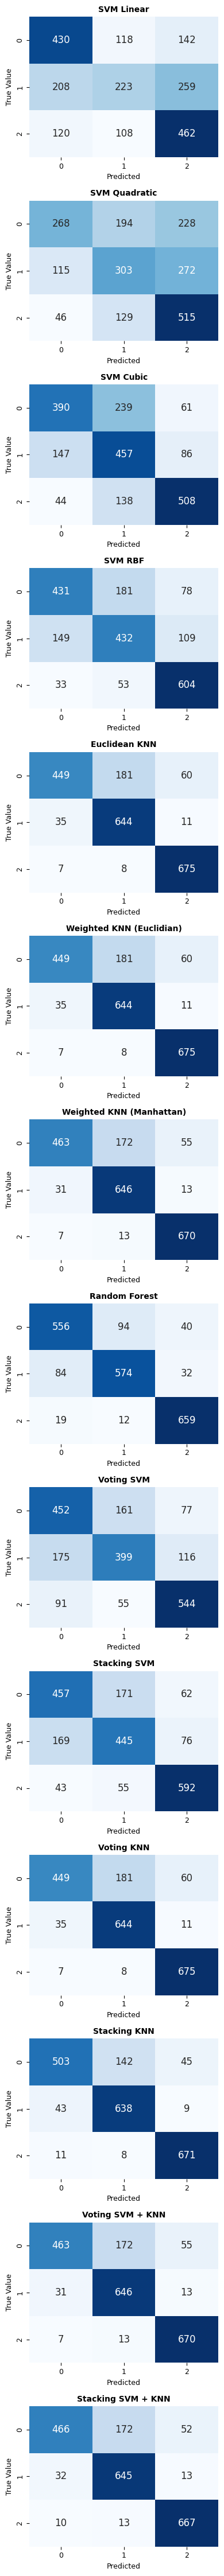

In [33]:
from sklearn.metrics import confusion_matrix

print("====================")
print("CONFUSION MATRIX")
print("====================")
fig, axes = plt.subplots(14, 1, figsize=(4, 45))
axes = axes.flatten()

for idx, (name, model) in enumerate(models.items()):
    y_pred = cross_val_predict(model, X_resampled, y_resampled, cv=skf)
    cm = confusion_matrix(y_resampled, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[idx], annot_kws={'size': 12})
    axes[idx].set_xlabel("Predicted", fontsize=9)
    axes[idx].set_ylabel("True Value", fontsize=9)
    axes[idx].set_title(name, fontsize=10, fontweight="bold")
    axes[idx].set_xticklabels(
      axes[idx].get_xticklabels(),
      fontsize=9,
    )
    axes[idx].set_yticklabels(
      axes[idx].get_yticklabels(),
      fontsize=9,
    )

plt.tight_layout()
plt.show()

In [34]:
rf_model.fit(X_resampled, y_resampled)
stacking_svm.fit(X_resampled, y_resampled)
stacking_knn.fit(X_resampled, y_resampled)

StackingClassifier(estimators=[('knn_weighted',
                                KNeighborsClassifier(metric='euclidean',
                                                     n_neighbors=1,
                                                     weights='distance')),
                               ('knn_euclidean',
                                KNeighborsClassifier(metric='euclidean',
                                                     n_neighbors=1)),
                               ('knn_manhattan',
                                KNeighborsClassifier(metric='manhattan',
                                                     n_neighbors=1,
                                                     weights='distance'))],
                   final_estimator=LogisticRegression())

In [ ]:
import joblib

joblib.dump(scaler_data, 'models/scaler_data.pkl')

for name, model in models.items():
  joblib.dump(model, f'models/{name}.pkl')